# (a) Consumption as a fraction of GDP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pce_data = pd.read_csv('/content/PCEC.csv', parse_dates=['observation_date'])

In [ ]:
pce_data.head()

,observation_date,PCEC
0,1947-01-01,156.161
1,1947-04-01,160.031
2,1947-07-01,163.543
3,1947-10-01,167.672
4,1948-01-01,170.372


In [ ]:
gdp_data = pd.read_csv('/content/GDP.csv', parse_dates=['observation_date'])

In [ ]:
gdp_data.head()

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
merged_data = pd.merge(pce_data, gdp_data, on='observation_date', how='inner')

In [ ]:
merged_data.head()

,observation_date,PCEC,GDP
0,1947-01-01,156.161,243.164
1,1947-04-01,160.031,245.968
2,1947-07-01,163.543,249.585
3,1947-10-01,167.672,259.745
4,1948-01-01,170.372,265.742


In [ ]:
merged_data['Consumption_Fraction'] = merged_data['PCEC'] / merged_data['GDP']

In [ ]:
merged_data.head()

,observation_date,PCEC,GDP,Consumption_Fraction
0,1947-01-01,156.161,243.164,0.642204
1,1947-04-01,160.031,245.968,0.650617
2,1947-07-01,163.543,249.585,0.655260
3,1947-10-01,167.672,259.745,0.645525
4,1948-01-01,170.372,265.742,0.641118


In [ ]:
average_consumption_fraction = merged_data['Consumption_Fraction'].mean()
std_deviation = merged_data['Consumption_Fraction'].std()

In [ ]:
print(f"Average Consumption as a Fraction of GDP: {average_consumption_fraction:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")

Average Consumption as a Fraction of GDP: 0.6364
Standard Deviation: 0.0318


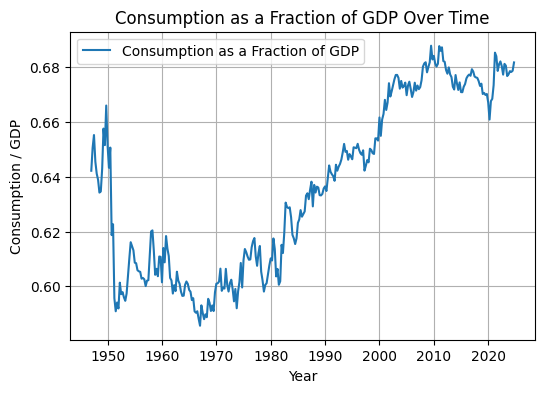

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data['observation_date'], merged_data['Consumption_Fraction'], label='Consumption as a Fraction of GDP')
plt.title('Consumption as a Fraction of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption / GDP')
plt.legend()
plt.grid(True)
plt.show()

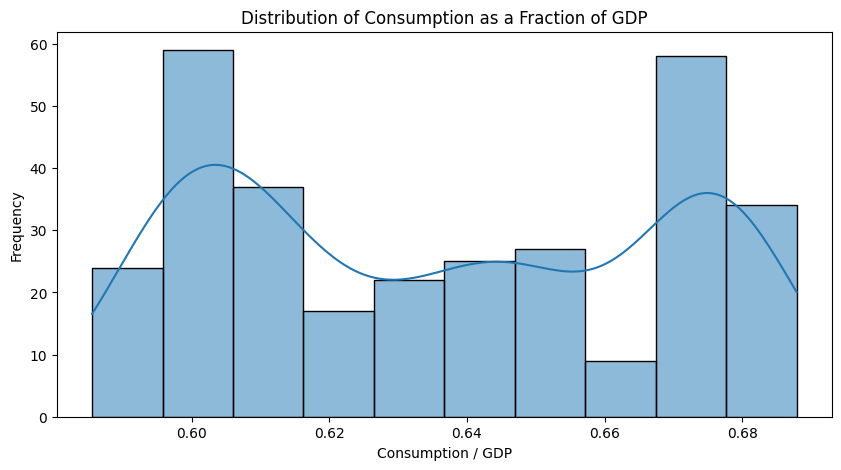

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_data['Consumption_Fraction'], kde=True)
plt.title('Distribution of Consumption as a Fraction of GDP')
plt.xlabel('Consumption / GDP')
plt.ylabel('Frequency')
plt.show()

In [ ]:
great_recession_data = merged_data[(merged_data['observation_date'] >= '2007-01-01') &
                                   (merged_data['observation_date'] <= '2009-12-31')]

In [ ]:
average_consumption_fraction1 =great_recession_data ['Consumption_Fraction'].mean()
std_deviation1 = great_recession_data['Consumption_Fraction'].std()
print(f"Average Consumption as a Fraction of GDP: {average_consumption_fraction1:.4f}")
print(f"Standard Deviation: {std_deviation1:.4f}")

Average Consumption as a Fraction of GDP: 0.6790
Standard Deviation: 0.0048


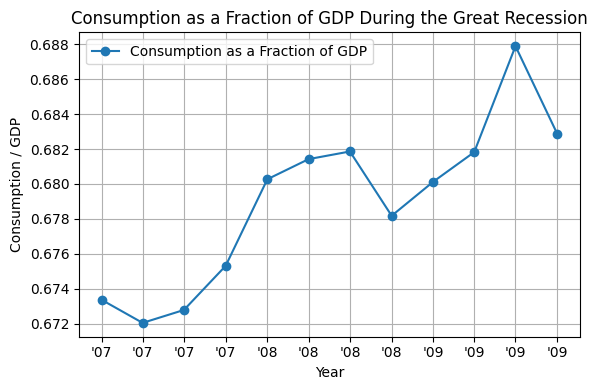

In [ ]:
plt.figure(figsize=(6, 4))

# Convert dates to two-digit year strings (e.g., '07, '08, '09)
two_digit_years = [f"'{date.strftime('%y')}" for date in great_recession_data['observation_date']]

plt.plot(great_recession_data['observation_date'],
         great_recession_data['Consumption_Fraction'],
         label='Consumption as a Fraction of GDP',
         marker='o')

plt.title('Consumption as a Fraction of GDP During the Great Recession')
plt.xlabel('Year')
plt.ylabel('Consumption / GDP')

# Set x-ticks to show two-digit years
plt.xticks(great_recession_data['observation_date'], two_digit_years)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Investment as a fraction of GDP


In [ ]:
gpdi_data = pd.read_csv('/content/GPDI.csv', parse_dates=['observation_date'])

In [ ]:
gpdi_data.head()

,observation_date,GPDI
0,1947-01-01,35.854
1,1947-04-01,34.505
2,1947-07-01,34.911
3,1947-10-01,43.250
4,1948-01-01,47.202


In [ ]:
gdp_data = pd.read_csv('/content/GDP.csv', parse_dates=['observation_date'])

In [ ]:
gdp_data.head()

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
merged_data = pd.merge(gdp_data, gpdi_data, on='observation_date', how='inner')
merged_data.head()

,observation_date,GDP,GPDI
0,1947-01-01,243.164,35.854
1,1947-04-01,245.968,34.505
2,1947-07-01,249.585,34.911
3,1947-10-01,259.745,43.250
4,1948-01-01,265.742,47.202


In [ ]:
merged_data['Investment_Fraction'] = merged_data['GPDI'] / merged_data['GDP']
merged_data.head()

,observation_date,GDP,GPDI,Investment_Fraction
0,1947-01-01,243.164,35.854,0.147448
1,1947-04-01,245.968,34.505,0.140282
2,1947-07-01,249.585,34.911,0.139876
3,1947-10-01,259.745,43.250,0.166509
4,1948-01-01,265.742,47.202,0.177623


In [ ]:
average_investment_fraction = merged_data['Investment_Fraction'].mean()
std_deviation = merged_data['Investment_Fraction'].std()

print(f"Average Investment as a Fraction of GDP: {average_investment_fraction:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")

Average Investment as a Fraction of GDP: 0.1736
Standard Deviation: 0.0161


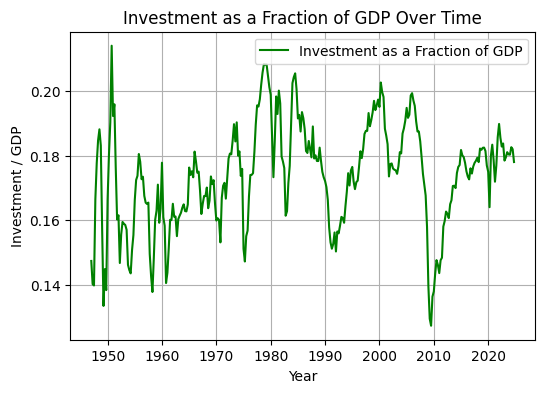

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data['observation_date'], merged_data['Investment_Fraction'],
         label='Investment as a Fraction of GDP', color='green')
plt.title('Investment as a Fraction of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Investment / GDP')
plt.legend()
plt.grid(True)
plt.show()

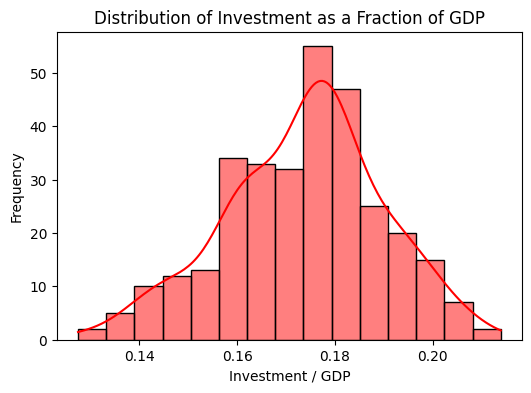

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(merged_data['Investment_Fraction'], kde=True, color='red')
plt.title('Distribution of Investment as a Fraction of GDP')
plt.xlabel('Investment / GDP')
plt.ylabel('Frequency')
plt.show()

In [ ]:
great_recession_data = merged_data[(merged_data['observation_date'] >= '2007-01-01') &
                                   (merged_data['observation_date'] <= '2009-12-31')]

In [ ]:
great_recession_data.head()

,observation_date,GDP,GPDI,Investment_Fraction
240,2007-01-01,14215.651,2664.295,0.187420
241,2007-04-01,14402.082,2699.217,0.187419
242,2007-07-01,14564.117,2685.969,0.184424
243,2007-10-01,14715.058,2642.560,0.179582
244,2008-01-01,14706.538,2563.701,0.174324


In [ ]:
great_recession_data.tail()

,observation_date,GDP,GPDI,Investment_Fraction
247,2008-10-01,14608.209,2307.915,0.157988
248,2009-01-01,14430.902,2014.878,0.139622
249,2009-04-01,14381.236,1863.650,0.129589
250,2009-07-01,14448.882,1841.416,0.127443
251,2009-10-01,14651.249,1998.710,0.136419


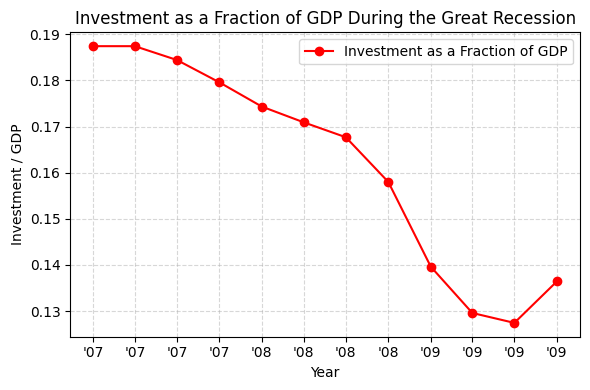

In [ ]:
plt.figure(figsize=(6, 4))

# Extract two-digit years from dates
two_digit_years = [f"'{d.strftime('%y')}" for d in great_recession_data['observation_date']]

plt.plot(great_recession_data['observation_date'],
         great_recession_data['Investment_Fraction'],
         label='Investment as a Fraction of GDP',
         color='red',
         marker='o')

plt.title('Investment as a Fraction of GDP During the Great Recession')
plt.xlabel('Year')
plt.ylabel('Investment / GDP')

# Set x-ticks to show two-digit years
plt.xticks(great_recession_data['observation_date'], two_digit_years)

plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (c) Government spending (all levels) as a fraction of GDP

In [ ]:
gdp_data = pd.read_csv('/content/GDP.csv', parse_dates=['observation_date'])
gdp_data.head()

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
gov_spending_data = pd.read_csv('/content/W068RCQ027SBEA.csv', parse_dates=['observation_date'])
gov_spending_data.head()

,observation_date,W068RCQ027SBEA
0,1960-01-01,144.233
1,1960-04-01,147.417
2,1960-07-01,150.459
3,1960-10-01,153.780
4,1961-01-01,157.254


In [ ]:
merged_data = pd.merge(gdp_data, gov_spending_data, on='observation_date', how='inner')
merged_data.head()

,observation_date,GDP,W068RCQ027SBEA
0,1960-01-01,542.648,144.233
1,1960-04-01,541.080,147.417
2,1960-07-01,545.604,150.459
3,1960-10-01,540.197,153.780
4,1961-01-01,545.018,157.254


In [ ]:
merged_data['gov_spending_fraction'] = merged_data['W068RCQ027SBEA'] / merged_data['GDP']
merged_data.head()

,observation_date,GDP,W068RCQ027SBEA,gov_spending_fraction
0,1960-01-01,542.648,144.233,0.265795
1,1960-04-01,541.080,147.417,0.272450
2,1960-07-01,545.604,150.459,0.275766
3,1960-10-01,540.197,153.780,0.284674
4,1961-01-01,545.018,157.254,0.288530


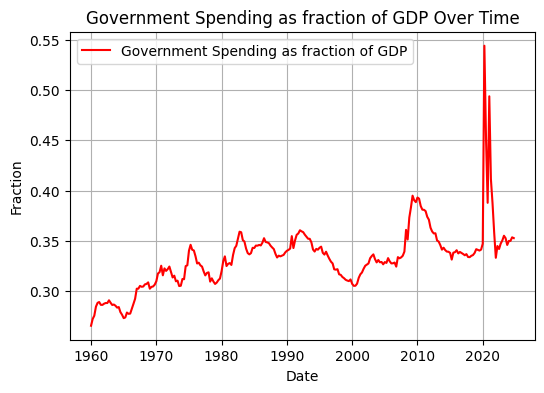

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data['observation_date'], merged_data['gov_spending_fraction'],
         label='Government Spending as fraction of GDP',color='red')
plt.title('Government Spending as fraction of GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Fraction')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
merged_data['gov_spending_fraction'].describe()

,gov_spending_fraction
count,260.000000
mean,0.332537
std,0.031257
min,0.265795
25%,0.314115
50%,0.334707
75%,0.345353
max,0.543983


In [ ]:
great_recession_data = merged_data[(merged_data['observation_date'] >= '2007-01-01') &
 (merged_data['observation_date'] <= '2009-12-31')]


In [ ]:
great_recession_data.head()

,observation_date,GDP,W068RCQ027SBEA,gov_spending_fraction
188,2007-01-01,14215.651,4747.079,0.333933
189,2007-04-01,14402.082,4792.841,0.332788
190,2007-07-01,14564.117,4859.514,0.333663
191,2007-10-01,14715.058,4934.382,0.335329
192,2008-01-01,14706.538,4991.989,0.339440


In [ ]:
great_recession_data.tail()

,observation_date,GDP,W068RCQ027SBEA,gov_spending_fraction
195,2008-10-01,14608.209,5452.409,0.373243
196,2009-01-01,14430.902,5533.429,0.383443
197,2009-04-01,14381.236,5680.717,0.395009
198,2009-07-01,14448.882,5641.212,0.390426
199,2009-10-01,14651.249,5693.132,0.388577


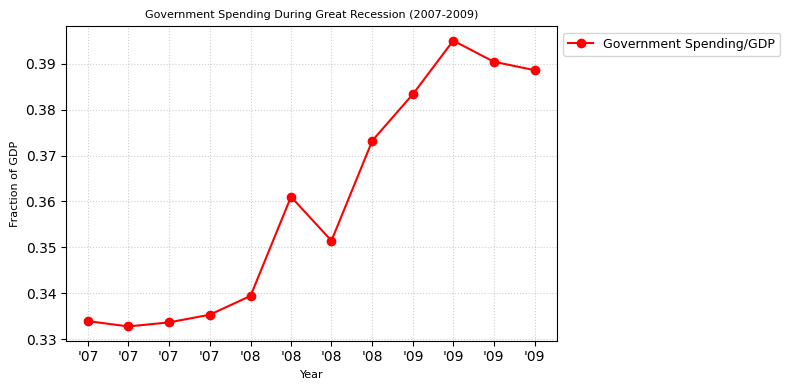

In [ ]:
plt.figure(figsize=(8, 4))

# Create two-digit year labels
year_labels = [f"'{date.strftime('%y')}" for date in great_recession_data['observation_date']]

# Plot with enhanced styling
plt.plot(great_recession_data['observation_date'],
         great_recession_data['gov_spending_fraction'],
         'r-o',                    # Red line with circle markers
         linewidth=1.5,            # Slightly thicker line
         markersize=6,             # Marker size
         label='Government Spending/GDP')

# Formatting
plt.title('Government Spending During Great Recession (2007-2009)', fontsize=8)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Fraction of GDP', fontsize=8)
plt.xticks(great_recession_data['observation_date'], year_labels)  # Two-digit years
plt.grid(True, linestyle=':', alpha=0.6)  # Dotted grid lines

# Adjust legend position if needed
plt.legend(fontsize=9, loc='upper left', bbox_to_anchor=(1, 1))  # Outside top-right

plt.tight_layout()
plt.show()

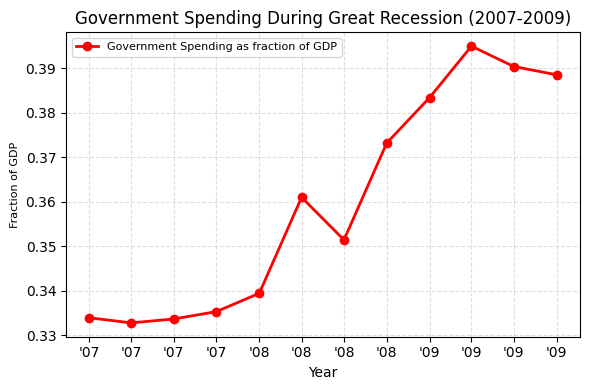

In [ ]:
plt.figure(figsize=(6, 4))

# Convert dates to two-digit year format (e.g., '07, '08, '09)
two_digit_years = [f"'{d.strftime('%y')}" for d in great_recession_data['observation_date']]

plt.plot(great_recession_data['observation_date'],
         great_recession_data['gov_spending_fraction'],
         'r-o',  # Red line with circle markers
         linewidth=2,
         markersize=6,
         label='Government Spending as fraction of GDP')

plt.title('Government Spending During Great Recession (2007-2009)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fraction of GDP', fontsize=8)

# Set x-ticks to show two-digit years
plt.xticks(great_recession_data['observation_date'], two_digit_years)

plt.legend(fontsize=8, loc='best')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

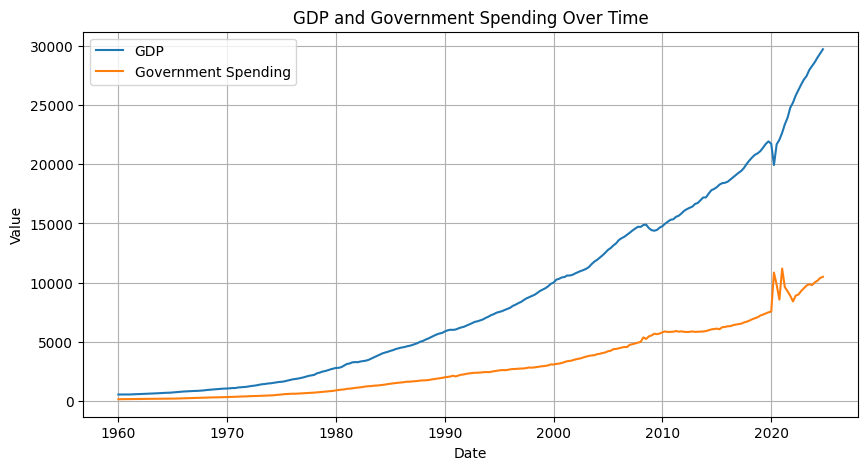

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(merged_data['observation_date'], merged_data['GDP'], label='GDP')
plt.plot(merged_data['observation_date'], merged_data['W068RCQ027SBEA'], label='Government Spending')
plt.title('GDP and Government Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# (d) Payments to labor as a share of GDP

In [ ]:
gdp_data = pd.read_csv('/content/GDP.csv', parse_dates=['observation_date'])

In [ ]:
labor_payments_data = pd.read_csv('/content/BA06RC1A027NBEA.csv', parse_dates=['observation_date'])
labor_payments_data.head()

,observation_date,BA06RC1A027NBEA
0,1982-01-01,1479.187
1,1983-01-01,1563.540
2,1984-01-01,1718.002
3,1985-01-01,1847.999
4,1986-01-01,1961.526


In [ ]:
gdp_data['year'] = gdp_data['observation_date'].dt.year
annual_gdp = gdp_data.groupby('year').last().reset_index()
gdp_data.head()

,observation_date,GDP,year
0,1947-01-01,243.164,1947
1,1947-04-01,245.968,1947
2,1947-07-01,249.585,1947
3,1947-10-01,259.745,1947
4,1948-01-01,265.742,1948


In [ ]:
merged_data = pd.merge(labor_payments_data, annual_gdp,
                       left_on=labor_payments_data['observation_date'].dt.year,
                       right_on='year', how='inner')
merged_data.head()

,observation_date_x,BA06RC1A027NBEA,year,observation_date_y,GDP
0,1982-01-01,1479.187,1982,1982-10-01,3402.561
1,1983-01-01,1563.540,1983,1983-10-01,3794.706
2,1984-01-01,1718.002,1984,1984-10-01,4148.551
3,1985-01-01,1847.999,1985,1985-10-01,4444.094
4,1986-01-01,1961.526,1986,1986-10-01,4657.627


In [ ]:
merged_data['labor_share_gdp'] = merged_data['BA06RC1A027NBEA'] / merged_data['GDP']
merged_data.head()

,observation_date_x,BA06RC1A027NBEA,year,observation_date_y,GDP,labor_share_gdp
0,1982-01-01,1479.187,1982,1982-10-01,3402.561,0.434728
1,1983-01-01,1563.540,1983,1983-10-01,3794.706,0.412032
2,1984-01-01,1718.002,1984,1984-10-01,4148.551,0.414121
3,1985-01-01,1847.999,1985,1985-10-01,4444.094,0.415833
4,1986-01-01,1961.526,1986,1986-10-01,4657.627,0.421143


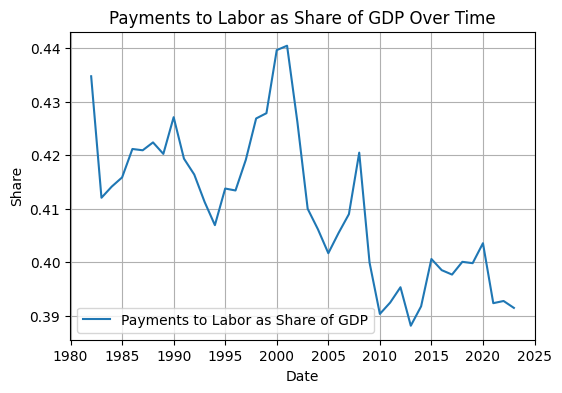

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data['observation_date_x'],
         merged_data['labor_share_gdp'],
         label='Payments to Labor as Share of GDP')
plt.title('Payments to Labor as Share of GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Share')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
merged_data['labor_share_gdp'].describe()

,labor_share_gdp
count,42.000000
mean,0.410399
std,0.013949
min,0.388125
25%,0.399836
50%,0.410615
75%,0.420400
max,0.440433


In [ ]:
great_recession_data = merged_data[(merged_data['observation_date_x'] >= '2007-01-01')
& (merged_data['observation_date_x'] <= '2009-12-31')]
great_recession_data.head()

,observation_date_x,BA06RC1A027NBEA,year,observation_date_y,GDP,labor_share_gdp
25,2007-01-01,6018.089,2007,2007-10-01,14715.058,0.408975
26,2008-01-01,6142.159,2008,2008-10-01,14608.209,0.420459
27,2009-01-01,5859.232,2009,2009-10-01,14651.249,0.399913


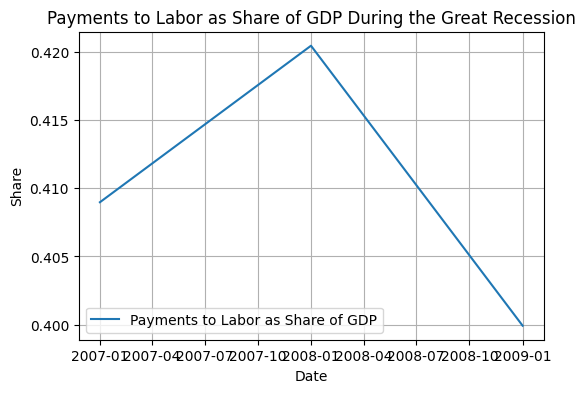

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(great_recession_data['observation_date_x'],
         great_recession_data['labor_share_gdp'],
         label='Payments to Labor as Share of GDP')
plt.title('Payments to Labor as Share of GDP During the Great Recession')
plt.xlabel('Date')
plt.ylabel('Share')
plt.legend()
plt.grid(True)
plt.show()

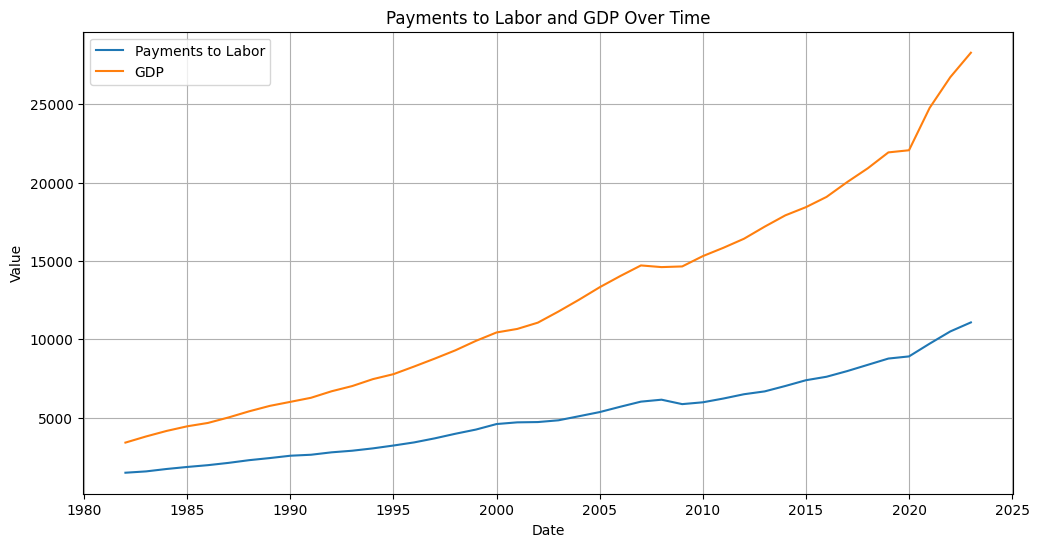

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['observation_date_x'],
         merged_data['BA06RC1A027NBEA'],
         label='Payments to Labor')
plt.plot(merged_data['observation_date_x'], merged_data['GDP'], label='GDP')
plt.title('Payments to Labor and GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# (e) Payments to capital as a share of GDP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

labor_share_df = pd.read_csv("/content/BA06RC1A027NBEA.csv")
gdp_df = pd.read_csv("/content/GDP.csv")

labor_share_df['observation_date'] = pd.to_datetime(labor_share_df['observation_date'])
gdp_df['observation_date'] = pd.to_datetime(gdp_df['observation_date'])

merged_df = pd.merge(labor_share_df, gdp_df, on='observation_date', how='inner')
merged_df.columns = ['Date', 'Labor_Share', 'GDP']

merged_df['Labor_Share_pct'] = (merged_df['Labor_Share'] / merged_df['GDP']) * 100
merged_df['Payment_to_Capital'] = 100 - merged_df['Labor_Share_pct']
merged_df['Capital_Share_GDP'] = merged_df['Payment_to_Capital']

# Great Recession period
recession_df = merged_df[(merged_df['Date'] >= '2007-01-01') & (merged_df['Date'] <= '2009-12-31')]


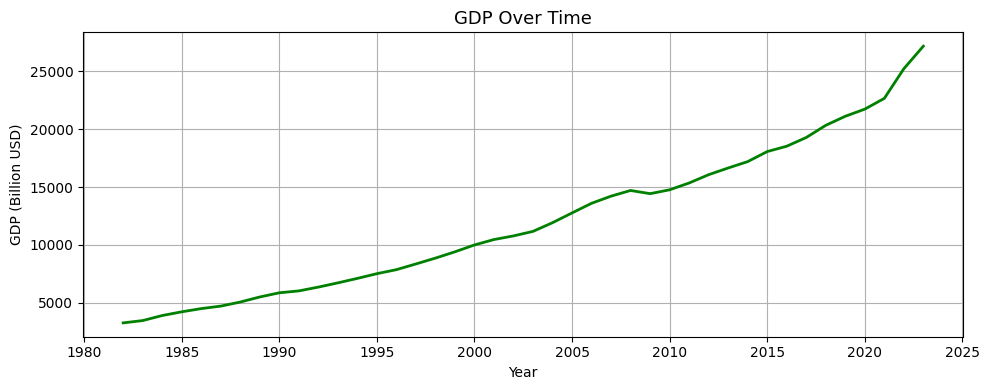

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=merged_df, x='Date', y='GDP', color='green', linewidth=2)
plt.title('GDP Over Time', fontsize=13)
plt.xlabel('Year')
plt.ylabel('GDP (Billion USD)')
plt.tight_layout()
plt.grid(True)
plt.show()

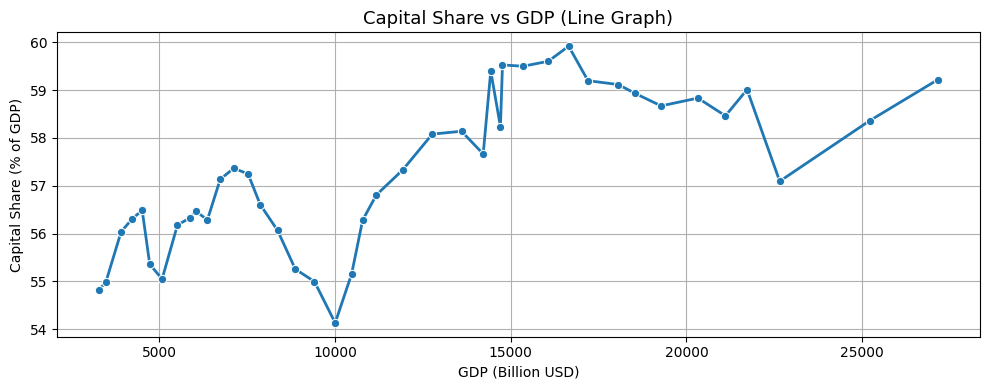

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=merged_df.sort_values('GDP'), x='GDP', y='Capital_Share_GDP', linewidth=2, marker='o')
plt.title('Capital Share vs GDP (Line Graph)', fontsize=13)
plt.xlabel('GDP (Billion USD)')
plt.ylabel('Capital Share (% of GDP)')
plt.tight_layout()
plt.grid(True)
plt.show()

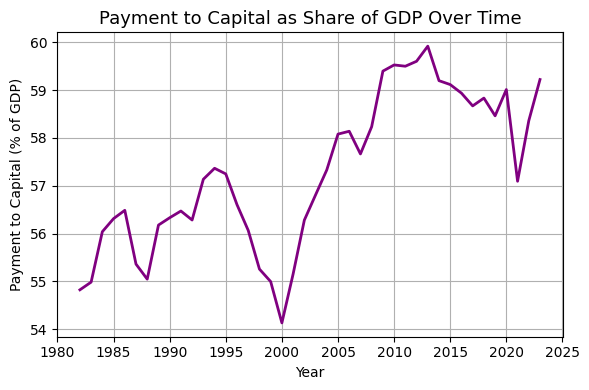

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=merged_df, x='Date', y='Payment_to_Capital', color='purple', linewidth=2)
plt.title('Payment to Capital as Share of GDP Over Time', fontsize=13)
plt.xlabel('Year')
plt.ylabel('Payment to Capital (% of GDP)')
plt.grid(True)
plt.tight_layout()
plt.show()

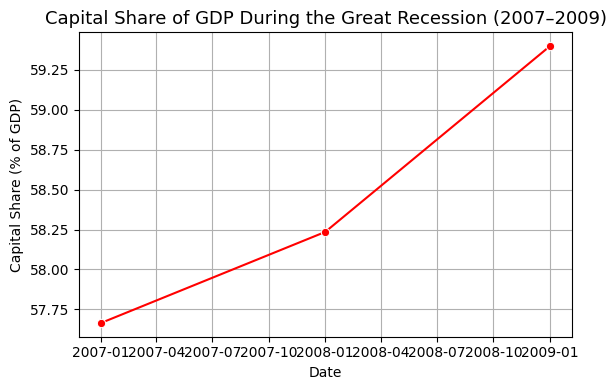

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=recession_df, x='Date', y='Capital_Share_GDP', marker='o', color='red')
plt.title('Capital Share of GDP During the Great Recession (2007–2009)', fontsize=13)
plt.xlabel('Date')
plt.ylabel('Capital Share (% of GDP)')
plt.tight_layout()
plt.grid(True)
plt.show()

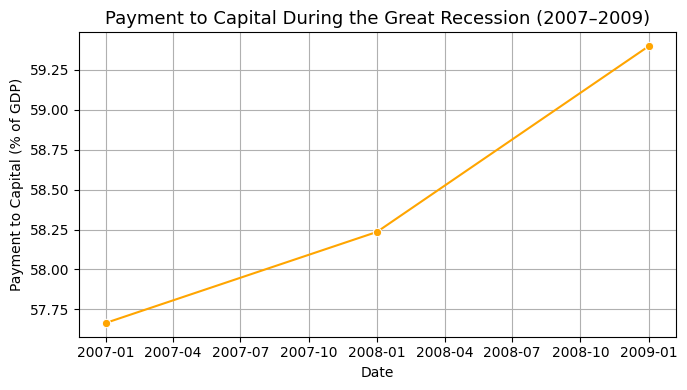

In [ ]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=recession_df, x='Date', y='Payment_to_Capital', color='orange', marker='o')
plt.title('Payment to Capital During the Great Recession (2007–2009)', fontsize=13)
plt.xlabel('Date')
plt.ylabel('Payment to Capital (% of GDP)')
plt.grid(True)
plt.tight_layout()
plt.show()

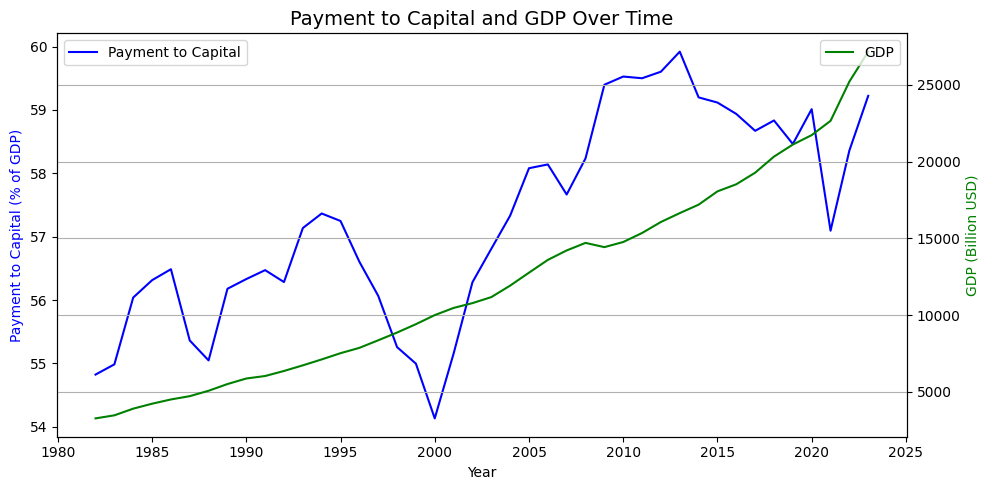

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x='Date', y='Payment_to_Capital', ax=ax1, color='blue', label='Payment to Capital')
sns.lineplot(data=merged_df, x='Date', y='GDP', ax=ax2, color='green', label='GDP')

ax1.set_ylabel('Payment to Capital (% of GDP)', color='blue')
ax2.set_ylabel('GDP (Billion USD)', color='green')
ax1.set_xlabel('Year')
ax1.set_title('Payment to Capital and GDP Over Time', fontsize=14)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# (f) Growth rate of output per capita

In [ ]:
population_data = pd.read_csv('/content/POPTHM.csv', parse_dates=['observation_date'])
population_data.set_index('observation_date', inplace=True)

In [ ]:
population_data.head()

,POPTHM
observation_date,
1959-01-01,175818
1959-02-01,176044
1959-03-01,176274
1959-04-01,176503
1959-05-01,176723


In [ ]:
merged_data = pd.merge(gdp_data, population_data, how='inner', left_index=True, right_index=True)

In [ ]:
merged_data.head()

,GDP,POPTHM
observation_date,,
1959-01-01,510.330,175818
1959-04-01,522.653,176503
1959-07-01,525.034,177208
1959-10-01,528.600,178026
1960-01-01,542.648,178925


In [ ]:
merged_data['GDP_per_capita'] = merged_data['GDP'] / merged_data['POPTHM']
merged_data.head()

,GDP,POPTHM,GDP_per_capita
observation_date,,,
1959-01-01,510.330,175818,0.002903
1959-04-01,522.653,176503,0.002961
1959-07-01,525.034,177208,0.002963
1959-10-01,528.600,178026,0.002969
1960-01-01,542.648,178925,0.003033


In [ ]:
merged_data['GDP_per_capita_growth_rate'] = merged_data['GDP_per_capita'].pct_change() * 100
merged_data.head()

,GDP,POPTHM,GDP_per_capita,GDP_per_capita_growth_rate
observation_date,,,,
1959-01-01,510.330,175818,0.002903,NaN
1959-04-01,522.653,176503,0.002961,2.017245
1959-07-01,525.034,177208,0.002963,0.055910
1959-10-01,528.600,178026,0.002969,0.216590
1960-01-01,542.648,178925,0.003033,2.141788


In [ ]:
merged_data.dropna(inplace=True)
merged_data.head()

,GDP,POPTHM,GDP_per_capita,GDP_per_capita_growth_rate
observation_date,,,,
1959-04-01,522.653,176503,0.002961,2.017245
1959-07-01,525.034,177208,0.002963,0.055910
1959-10-01,528.600,178026,0.002969,0.216590
1960-01-01,542.648,178925,0.003033,2.141788
1960-04-01,541.080,180067,0.003005,-0.921329


In [ ]:
print("Summary Statistics for GDP per Capita:")
print(merged_data['GDP_per_capita_growth_rate'].describe())

Summary Statistics for GDP per Capita:
count    263.000000
mean       1.309251
std        1.212412
min       -8.333440
25%        0.818394
50%        1.209708
75%        1.783721
max        8.737473
Name: GDP_per_capita_growth_rate, dtype: float64


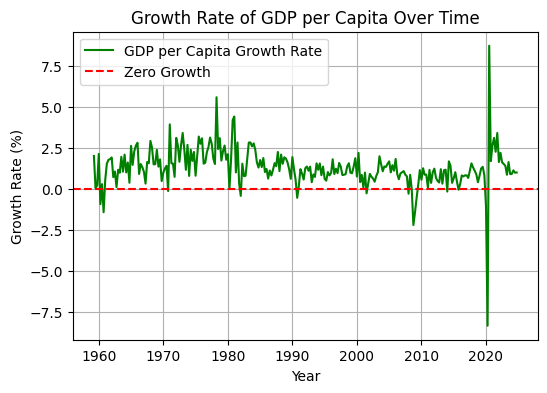

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data.index,
         merged_data['GDP_per_capita_growth_rate'],
         label='GDP per Capita Growth Rate', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Growth')
plt.title('Growth Rate of GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
great_recession_start = '2007-01-01'
great_recession_end = '2009-12-31'

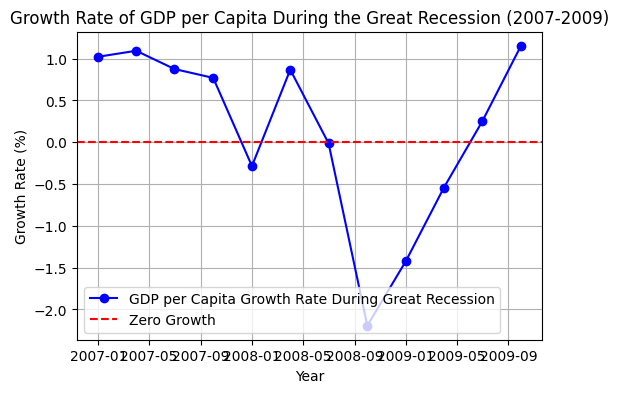

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data.loc[great_recession_start:great_recession_end].index,
         merged_data.loc[great_recession_start:great_recession_end]['GDP_per_capita_growth_rate'],
         label='GDP per Capita Growth Rate During Great Recession', color='blue', marker='o')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Growth')
plt.title('Growth Rate of GDP per Capita During the Great Recession (2007-2009)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# (g) Growth rate of consumption per capita

In [ ]:
consumption_data = pd.read_csv('/content/PCEC.csv', parse_dates=['observation_date'])
consumption_data.set_index('observation_date', inplace=True)

In [ ]:
consumption_data.head()

,PCEC
observation_date,
1947-01-01,156.161
1947-04-01,160.031
1947-07-01,163.543
1947-10-01,167.672
1948-01-01,170.372


In [ ]:
merged_data = pd.merge(gdp_data, population_data, how='inner', left_index=True, right_index=True)
merged_data = pd.merge(merged_data, consumption_data, how='inner', left_index=True, right_index=True)

In [ ]:
merged_data.head()

,GDP,POPTHM,PCEC
observation_date,,,
1959-01-01,510.330,175818,309.449
1959-04-01,522.653,176503,315.505
1959-07-01,525.034,177208,320.725
1959-10-01,528.600,178026,322.842
1960-01-01,542.648,178925,326.364


In [ ]:
merged_data['consumption_per_capita'] = merged_data['PCEC'] / merged_data['POPTHM']

In [ ]:
merged_data.head()

,GDP,POPTHM,PCEC,consumption_per_capita
observation_date,,,,
1959-01-01,510.330,175818,309.449,0.001760
1959-04-01,522.653,176503,315.505,0.001788
1959-07-01,525.034,177208,320.725,0.001810
1959-10-01,528.600,178026,322.842,0.001813
1960-01-01,542.648,178925,326.364,0.001824


In [ ]:
merged_data['consumption_per_capita_growth_rate'] = merged_data['consumption_per_capita'].pct_change() * 100

In [ ]:
merged_data.head()

,GDP,POPTHM,PCEC,consumption_per_capita,consumption_per_capita_growth_rate
observation_date,,,,,
1959-01-01,510.330,175818,309.449,0.001760,NaN
1959-04-01,522.653,176503,315.505,0.001788,1.561336
1959-07-01,525.034,177208,320.725,0.001810,1.250071
1959-10-01,528.600,178026,322.842,0.001813,0.197551
1960-01-01,542.648,178925,326.364,0.001824,0.583010


In [ ]:
merged_data.dropna(inplace=True)

In [ ]:
print("Summary Statistics for Consumption per Capita Growth Rate:")
print(merged_data['consumption_per_capita_growth_rate'].describe())

Summary Statistics for Consumption per Capita Growth Rate:
count    263.000000
mean       1.354393
std        1.208361
min       -9.193997
25%        0.834500
50%        1.242092
75%        1.856224
max        9.848127
Name: consumption_per_capita_growth_rate, dtype: float64


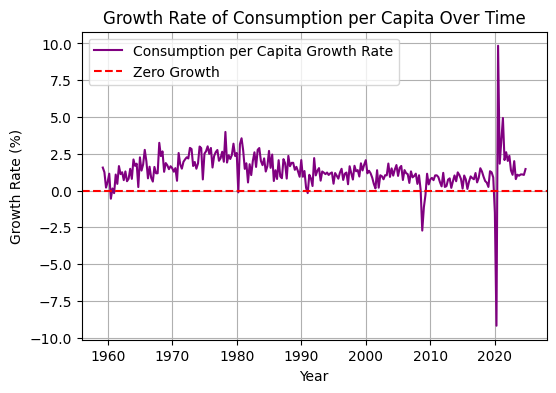

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data.index, merged_data['consumption_per_capita_growth_rate'],
         label='Consumption per Capita Growth Rate', color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Growth')
plt.title('Growth Rate of Consumption per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

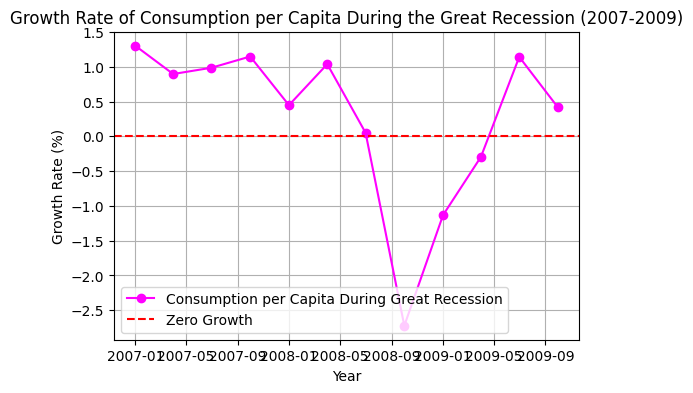

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(merged_data.loc[great_recession_start:great_recession_end].index,
         merged_data.loc[great_recession_start:great_recession_end]['consumption_per_capita_growth_rate'],
         label='Consumption per Capita During Great Recession', color='magenta', marker='o')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Growth')
plt.title('Growth Rate of Consumption per Capita During the Great Recession (2007-2009)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

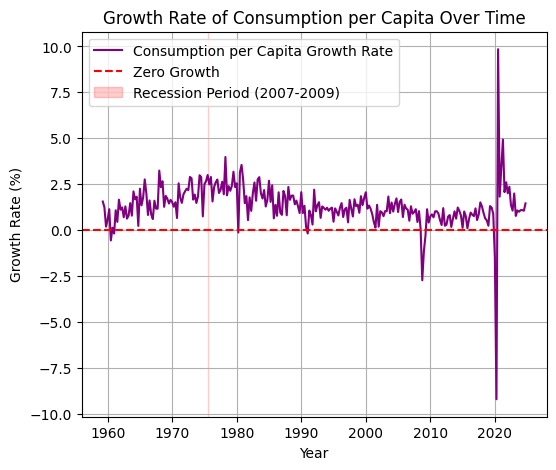

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(merged_data.index, merged_data['consumption_per_capita_growth_rate'],
         label='Consumption per Capita Growth Rate', color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Growth')

# Highlight recession period
plt.axvspan(2007, 2009, color='red', alpha=0.2, label='Recession Period (2007-2009)')

plt.title('Growth Rate of Consumption per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# (h) Civilian unemployment rate

In [ ]:
unemployment_data = pd.read_csv('/content/UNRATE.csv', parse_dates=['observation_date'])
unemployment_data.set_index('observation_date', inplace=True)
unemployment_data.head()

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [ ]:
print("Summary Statistics for Civilian Unemployment Rate:")
print(unemployment_data['UNRATE'].describe())

Summary Statistics for Civilian Unemployment Rate:
count    926.000000
mean       5.679914
std        1.708815
min        2.500000
25%        4.325000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64


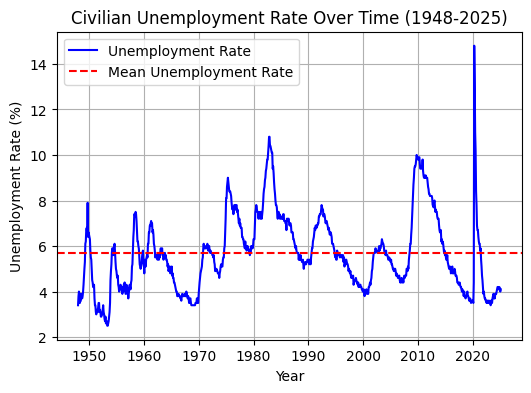

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(unemployment_data.index, unemployment_data['UNRATE'], label='Unemployment Rate', color='blue')
plt.axhline(y=unemployment_data['UNRATE'].mean(), color='red', linestyle='--', label='Mean Unemployment Rate')
plt.title('Civilian Unemployment Rate Over Time (1948-2025)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
great_recession_start = '2007-01-01'
great_recession_end = '2009-12-31'

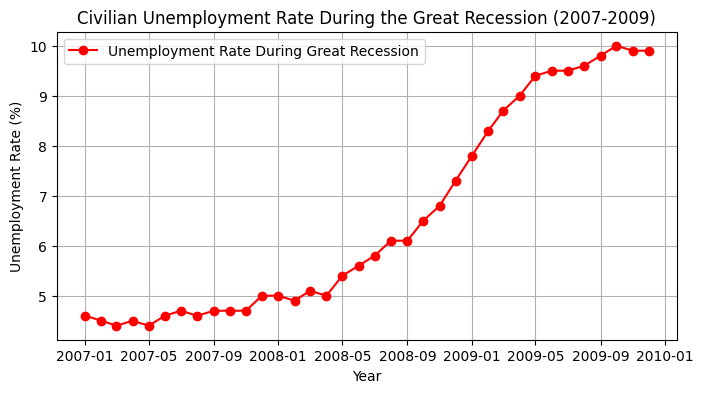

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(unemployment_data.loc[great_recession_start:great_recession_end].index,
         unemployment_data.loc[great_recession_start:great_recession_end]['UNRATE'],
         label='Unemployment Rate During Great Recession', color='red', marker='o')
plt.title('Civilian Unemployment Rate During the Great Recession (2007-2009)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
covid_start = '2020-01-01'
covid_end = '2021-12-01'

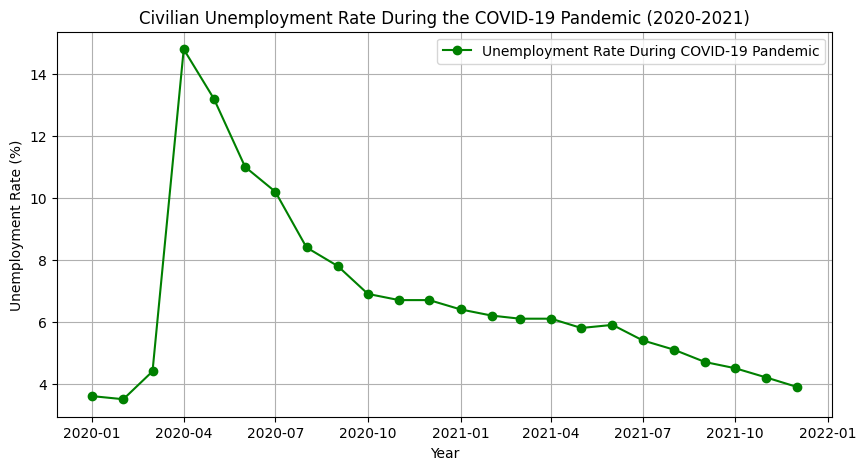

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(unemployment_data.loc[covid_start:covid_end].index,
         unemployment_data.loc[covid_start:covid_end]['UNRATE'],
         label='Unemployment Rate During COVID-19 Pandemic', color='green', marker='o')
plt.title('Civilian Unemployment Rate During the COVID-19 Pandemic (2020-2021)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# (i) Average duration of unemployment

In [ ]:
unemployment_duration_data = pd.read_csv('/content/UEMPMEAN.csv', parse_dates=['observation_date'])
unemployment_duration_data.set_index('observation_date', inplace=True)
unemployment_duration_data.head()

,UEMPMEAN
observation_date,
1948-01-01,8.9
1948-02-01,8.4
1948-03-01,8.7
1948-04-01,8.5
1948-05-01,9.1


In [ ]:
print("Summary Statistics for Average Duration of Unemployment:")
print(unemployment_duration_data['UEMPMEAN'].describe())

Summary Statistics for Average Duration of Unemployment:
count    926.000000
mean      16.511771
std        7.192653
min        7.100000
25%       11.800000
50%       14.650000
75%       19.000000
max       40.700000
Name: UEMPMEAN, dtype: float64


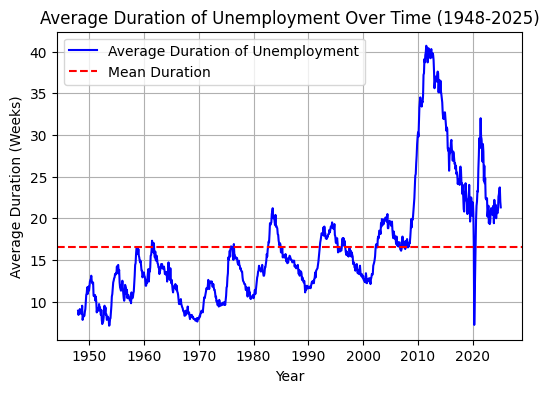

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(unemployment_duration_data.index,
         unemployment_duration_data['UEMPMEAN'],
         label='Average Duration of Unemployment', color='blue')
plt.axhline(y=unemployment_duration_data['UEMPMEAN'].mean(), color='red', linestyle='--', label='Mean Duration')
plt.title('Average Duration of Unemployment Over Time (1948-2025)')
plt.xlabel('Year')
plt.ylabel('Average Duration (Weeks)')
plt.legend()
plt.grid(True)
plt.show()

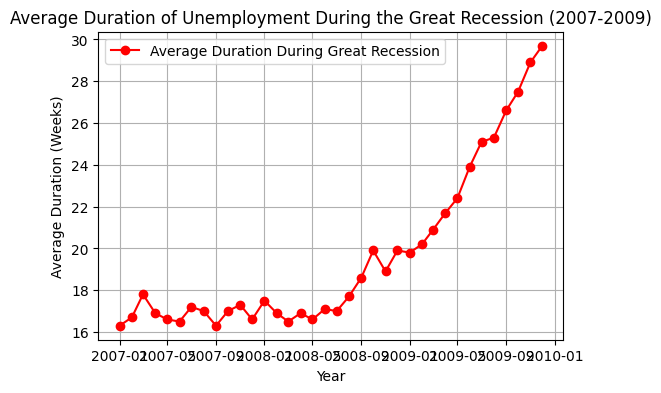

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(unemployment_duration_data.loc[great_recession_start:great_recession_end].index,
         unemployment_duration_data.loc[great_recession_start:great_recession_end]['UEMPMEAN'],
         label='Average Duration During Great Recession', color='red', marker='o')
plt.title('Average Duration of Unemployment During the Great Recession (2007-2009)')
plt.xlabel('Year')
plt.ylabel('Average Duration (Weeks)')
plt.legend()
plt.grid(True)
plt.show()

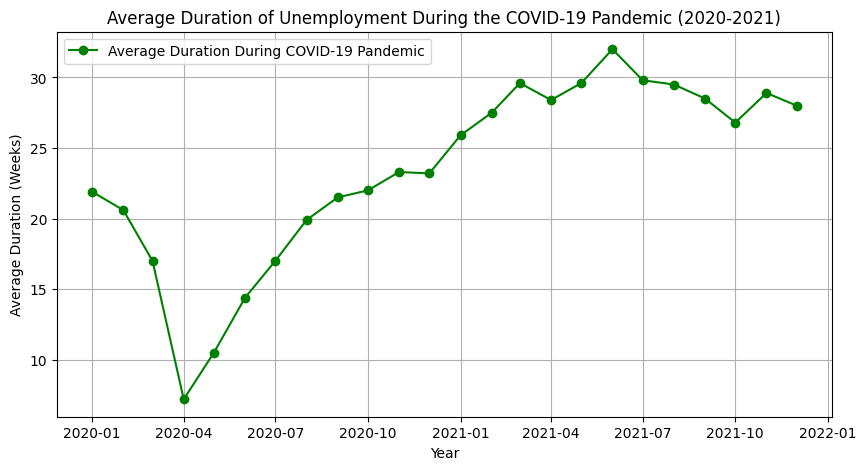

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(unemployment_duration_data.loc[covid_start:covid_end].index,
         unemployment_duration_data.loc[covid_start:covid_end]['UEMPMEAN'],
         label='Average Duration During COVID-19 Pandemic', color='green', marker='o')
plt.title('Average Duration of Unemployment During the COVID-19 Pandemic (2020-2021)')
plt.xlabel('Year')
plt.ylabel('Average Duration (Weeks)')
plt.legend()
plt.grid(True)
plt.show()

# (j) Inflation

In [ ]:
gdp_data = pd.read_csv('/content/GDP.csv', parse_dates=['observation_date'])
gdp_data.set_index('observation_date', inplace=True)

In [ ]:
gdp_data.head()

,GDP
observation_date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [ ]:
inflation_data = pd.read_csv('/content/FPCPITOTLZGUSA.csv', parse_dates=['observation_date'])
inflation_data.set_index('observation_date', inplace=True)

In [ ]:
inflation_data.head()

,FPCPITOTLZGUSA
observation_date,
1960-01-01,1.457976
1961-01-01,1.070724
1962-01-01,1.198773
1963-01-01,1.239669
1964-01-01,1.278912


In [ ]:
merged_data = pd.merge(gdp_data, inflation_data, how='inner', left_index=True, right_index=True)

In [ ]:
merged_data.head()

,GDP,FPCPITOTLZGUSA
observation_date,,
1960-01-01,542.648,1.457976
1961-01-01,545.018,1.070724
1962-01-01,594.013,1.198773
1963-01-01,621.672,1.239669
1964-01-01,669.822,1.278912


In [ ]:
inflation_mean = inflation_data['FPCPITOTLZGUSA'].mean()
print(f"Inflation Mean: {inflation_mean:.2f}")


Inflation Mean: 3.77


In [ ]:
inflation_variance = inflation_data['FPCPITOTLZGUSA'].var()
print(f"Inflation Variance: {inflation_variance:.2f}")

Inflation Variance: 7.63


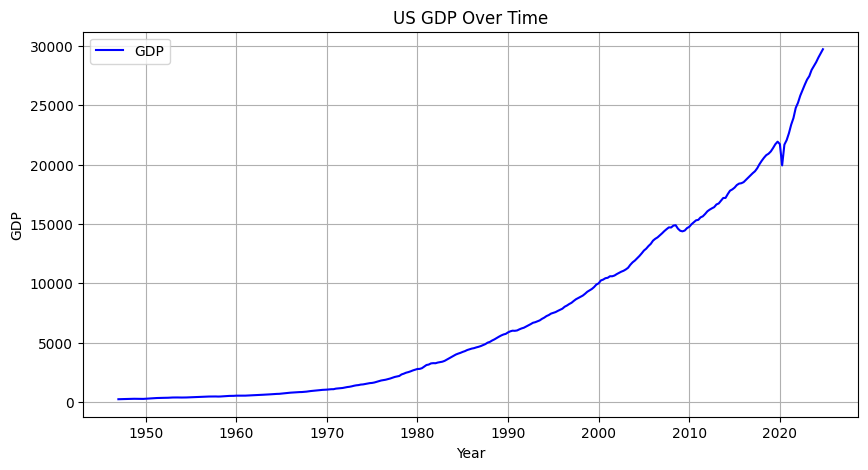

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(gdp_data.index, gdp_data['GDP'], label='GDP', color='blue')
plt.title('US GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

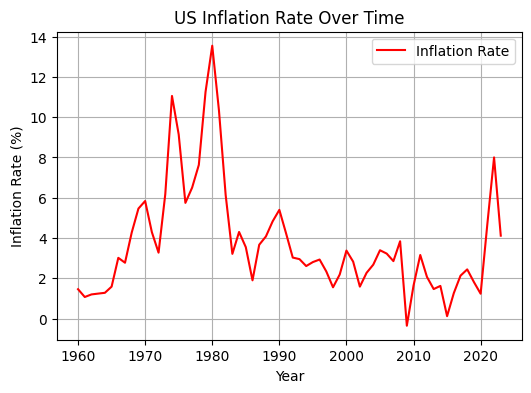

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(inflation_data.index, inflation_data['FPCPITOTLZGUSA'],
         label='Inflation Rate', color='red')
plt.title('US Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
great_recession_start = '2007-01-01'
great_recession_end = '2009-12-31'

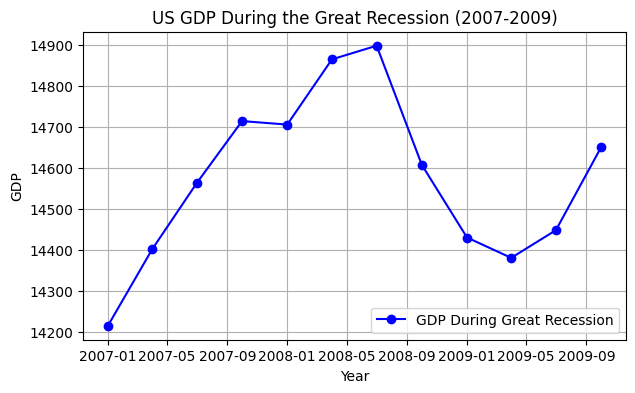

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(gdp_data.loc[great_recession_start:great_recession_end].index,
         gdp_data.loc[great_recession_start:great_recession_end]['GDP'],
         label='GDP During Great Recession', color='blue', marker='o')
plt.title('US GDP During the Great Recession (2007-2009)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

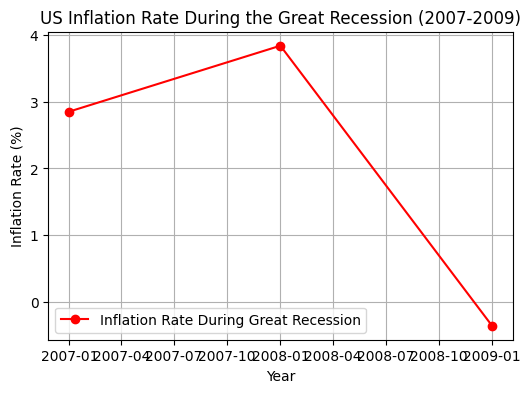

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(inflation_data.loc[great_recession_start:great_recession_end].index,
         inflation_data.loc[great_recession_start:great_recession_end]['FPCPITOTLZGUSA'],
         label='Inflation Rate During Great Recession', color='red', marker='o')
plt.title('US Inflation Rate During the Great Recession (2007-2009)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

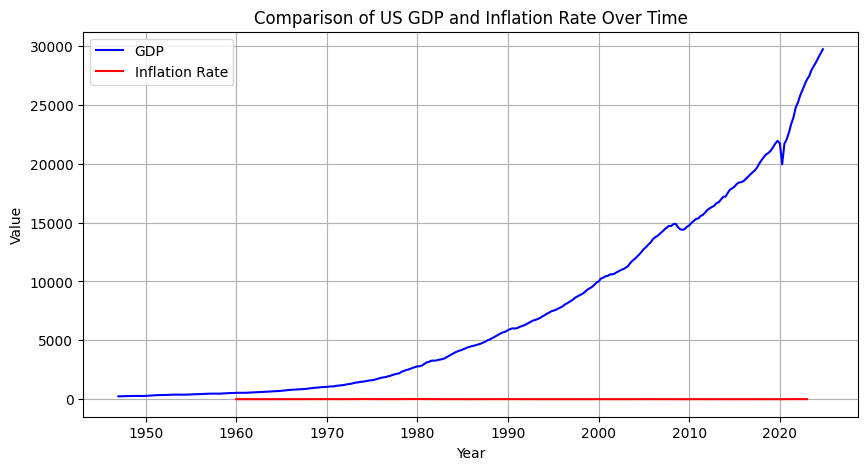

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(gdp_data.index, gdp_data['GDP'], label='GDP', color='blue')
plt.plot(inflation_data.index, inflation_data['FPCPITOTLZGUSA'], label='Inflation Rate', color='red')
plt.title('Comparison of US GDP and Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()